In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from core.data import load_from_kaggle


In [15]:
dataset_link = "yunusemretokdemir/customer-segmentation" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

100%|██████████| 1.64M/1.64M [00:00<00:00, 4.69MB/s]

Extracting files...
Loading dataset from C:\Users\Anna\.cache\kagglehub\datasets\yunusemretokdemir\customer-segmentation\versions\1 to ../data/raw\customer-segmentation
Moving file: C:\Users\Anna\.cache\kagglehub\datasets\yunusemretokdemir\customer-segmentation\versions\1\PBL5recommendationdata.csv to c:\Anna-Project\notebooks\../data/raw\customer-segmentation
Files moved to '../data/raw\customer-segmentation' directory.


In [38]:
files

['PBL5recommendationdata.csv']

In [48]:
#df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]), encoding="latin1")
df = pd.read_csv("/".join(["../data/raw", dataset_name, "PBL5recommendationdata_cut.csv"]), sep=';')
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.mailing,Customers.last_modified,Orders.id,Orders.customer_id,Orders.fname,...,Products.multiple,Products.latex,Products.case_qty,Products.notes,Products.map_price,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.handling_time,Products.family_id
0,797,Christy,Dill,Company0,1426018724,NaN,1437764306,3758,797,Christy,...,1 EA,NaN,1.0,NaN,NaN,24.80,7.50,30.40,NaN,PF61071
1,3,John,Smith,Company1,1386089139,NaN,1437764354,23,3,John,...,1 EA,Yes,1.0,OFF sale cause it is an RX item,NaN,8.00,7.00,1.50,NaN,PF02132
2,3,John,Smith,Company1,1386089139,NaN,1437764354,9531,3,John,...,1 CS,NaN,800.0,NaN,NaN,13.23,10.04,10.24,NaN,PF00342
3,4,James,Anderson,NaN,1386780263,NaN,1437762646,29,4,James,...,1 EA,Yes,1.0,NaN,NaN,10.60,7.80,18.50,NaN,PF04970
4,5,Abraham,Pollak,Company3,1386861599,0.0,1437764316,30,5,Abraham,...,1 EA,NaN,1.0,OFF sale cause it is an RX item,NaN,8.50,2.75,12.00,NaN,PF03045


In [49]:
df['Customers.create_date'] = pd.to_datetime(df['Customers.create_date'], unit='s')
df['Customers.last_modified'] = pd.to_datetime(df['Customers.last_modified'], unit='s')

In [53]:
df['Orders.placed_date'] = pd.to_datetime(df['Orders.placed_date'], unit='s')
df['Orders.payment_date'] = pd.to_datetime(df['Orders.payment_date'], unit='s')
df['Orders.updated_date'] = pd.to_datetime(df['Orders.updated_date'], unit='s')
df['Orders.shipped_date'] = pd.to_datetime(df['Orders.shipped_date'], unit='s')
df['Products.last_modified'] = pd.to_datetime(df['Products.last_modified'], unit='s')
df['Products.qb_edit_sequence'] = pd.to_datetime(df['Products.qb_edit_sequence'], unit='s')

In [59]:
df["Customers.create_date"] = pd.to_datetime(df["Customers.create_date"]).dt.round('s')
df["Customers.last_modified"] = pd.to_datetime(df["Customers.last_modified"]).dt.round('s')
df["Orders.placed_date"] = pd.to_datetime(df["Orders.placed_date"]).dt.round('s')
df["Orders.payment_date"] = pd.to_datetime(df["Orders.payment_date"]).dt.round('s')
df["Orders.updated_date"] = pd.to_datetime(df["Orders.updated_date"]).dt.round('s')
df["Orders.shipped_date"] = pd.to_datetime(df["Orders.shipped_date"]).dt.round('s')
df["Products.last_modified"] = pd.to_datetime(df["Products.last_modified"]).dt.round('s')
df["Products.qb_edit_sequence"] = pd.to_datetime(df["Products.qb_edit_sequence"]).dt.round('s') 


In [60]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(4194, 94)

'Description'

,count,mean,min,25%,50%,75%,max,std
Customers.id,4194.0,1796.52,3.0,865.25,1747.5,2698.75,3736.0,1065.68
Customers.create_date,4194,2015-08-30 21:50:33.705769984,2013-12-03 16:45:39,2015-03-25 22:34:54,2015-11-01 21:00:05,2016-03-02 21:43:58.249999872,2016-05-16 17:00:49,NaN
Customers.mailing,2114.0,0.98,0.0,1.0,1.0,1.0,1.0,0.14
Customers.last_modified,4194,2015-12-18 01:06:01.111110912,2015-07-22 09:59:40,2015-07-24 18:41:19.249999872,2016-03-02 21:20:24,2016-03-02 21:53:39.750000128,2016-05-16 17:00:49,NaN
Orders.id,4194.0,9142.98,23.0,4258.0,9641.0,14011.75,17437.0,5276.54
Orders.customer_id,4194.0,1796.52,3.0,865.25,1747.5,2698.75,3736.0,1065.68
Orders.reorder_id,82.0,7389.16,30.0,4537.25,6887.0,10832.0,16201.0,3818.09
Orders.external_id,5.0,601806117.48,66.38,1698485.0,1698485.0,1698485.0,3003935066.0,1342831106.3
Orders.subtotal,4194.0,131.93,2.89,36.75,74.74,139.96,5163.04,231.16
Orders.tax,3737.0,0.8,0.0,0.0,0.0,0.0,132.93,4.86


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Customers.id,int64,0,3054,"[2145, 32, 3480]"
Customers.fname,object,0,1631,"[Audrey M, Lee, Kay]"
Customers.lname,object,0,2557,"[gunther, Wojczynski, Callham]"
Customers.company,object,3467,425,"[nan, nan, nan]"
Customers.create_date,datetime64[ns],0,3054,"[2016-03-15 21:45:23, 2015-06-25 19:24:16, 201..."
...,...,...,...,...
Products.shipping_length,float64,196,460,"[35.4, 33.4, 6.75]"
Products.shipping_width,float64,196,392,"[11.0, 4.0, nan]"
Products.shipping_height,float64,196,361,"[7.0, nan, 1.8]"
Products.handling_time,object,3196,6,"[nan, Ships Same Day, Ships Same Day]"


In [61]:
df["Customers.create_date"].head(10)


0   2015-03-10 20:18:44
1   2013-12-03 16:45:39
2   2013-12-03 16:45:39
3   2013-12-11 16:44:23
4   2013-12-12 15:19:59
5   2013-12-12 15:19:59
6   2013-12-12 15:19:59
7   2013-12-27 14:52:27
8   2014-01-09 21:33:36
9   2014-01-23 20:38:36
Name: Customers.create_date, dtype: datetime64[ns]

In [37]:
df["Orders.id"].nunique(), df["Customers.id"].nunique(), 

(3565, 3054)

In [35]:
#plt.figure(figsize=(14, 12), dpi=200)
#sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", center=0)
#plt.show()

In [78]:
#corr = df.corr(numeric_only=True).abs()
#strong = corr[corr > 0.4]

#plt.figure(figsize=(14, 10), dpi=200)
#sns.heatmap(strong, cmap="coolwarm", center=0, annot=False)
#plt.show()

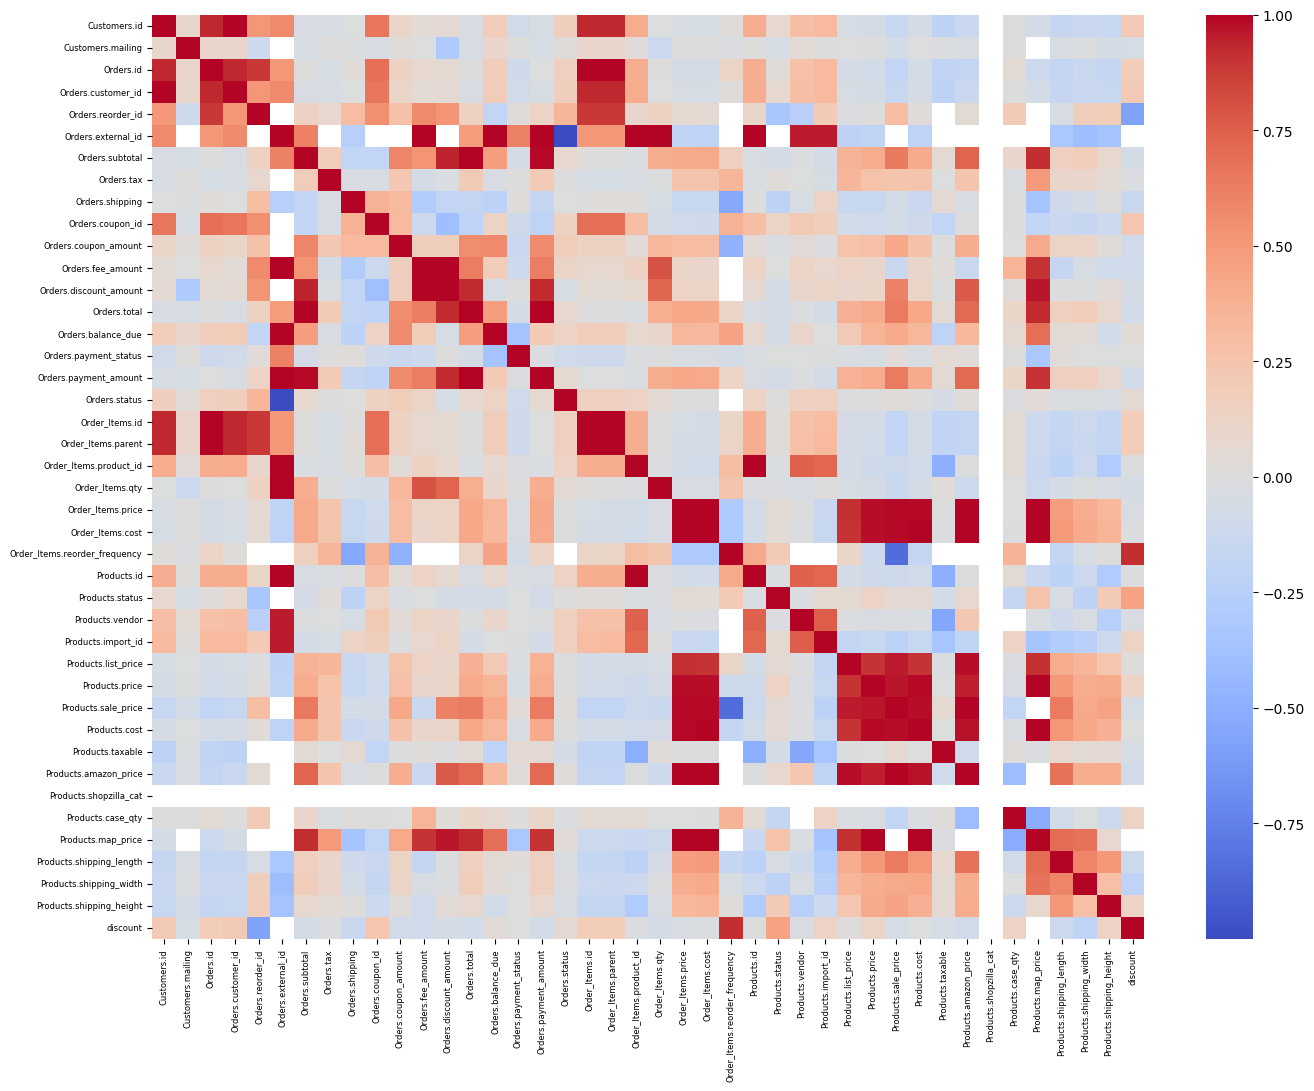

In [79]:
plt.figure(figsize=(16, 12), dpi=100)
corr = df.corr(numeric_only=True)

sns.heatmap(corr, 
            cmap="coolwarm",
            center=0,
            annot=False)

plt.xticks(rotation=90, fontsize=6)
plt.yticks(rotation=0, fontsize=6)

plt.show()

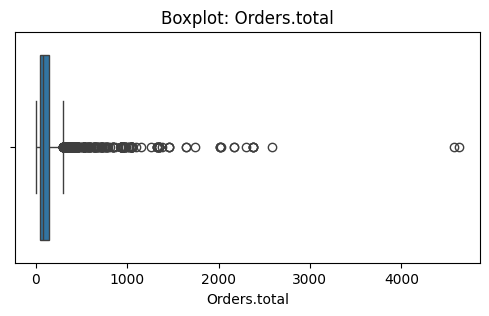

In [80]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df["Orders.total"])
plt.title("Boxplot: Orders.total")
plt.show()

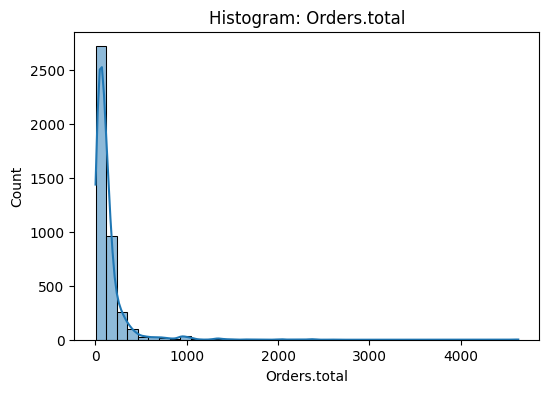

In [81]:
plt.figure(figsize=(6,4))
sns.histplot(df["Orders.total"], bins=40, kde=True)
plt.title("Histogram: Orders.total")
plt.show()

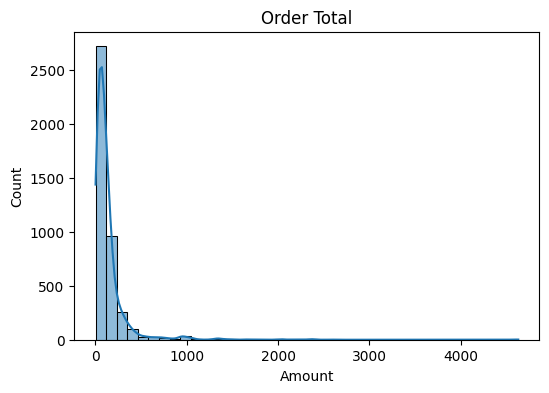

In [74]:
plt.figure(figsize=(6,4))
sns.histplot(df["Orders.total"], bins=40, kde=True)
plt.title("Order Total")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 95 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customers.id                   4194 non-null   int64         
 1   Customers.fname                4194 non-null   object        
 2   Customers.lname                4194 non-null   object        
 3   Customers.company              727 non-null    object        
 4   Customers.create_date          4194 non-null   datetime64[ns]
 5   Customers.mailing              2114 non-null   float64       
 6   Customers.last_modified        4194 non-null   datetime64[ns]
 7   Orders.id                      4194 non-null   int64         
 8   Orders.customer_id             4194 non-null   int64         
 9   Orders.fname                   4194 non-null   object        
 10  Orders.lname                   4194 non-null   object        
 11  Orders.company   

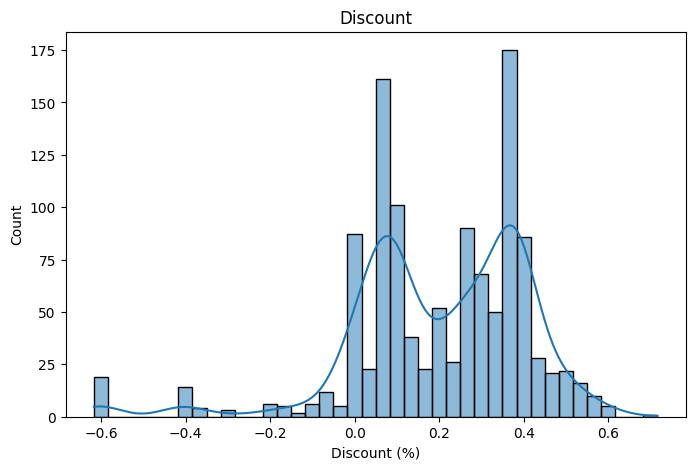

In [75]:
# % розподіл величини знижки
df["discount"] = (df["Products.price"] - df["Products.sale_price"]) / df["Products.price"]

plt.figure(figsize=(8,5))
sns.histplot(df["discount"], bins=40, kde=True)
plt.title("Discount")
plt.xlabel("Discount (%)")
plt.ylabel("Count")
plt.show()

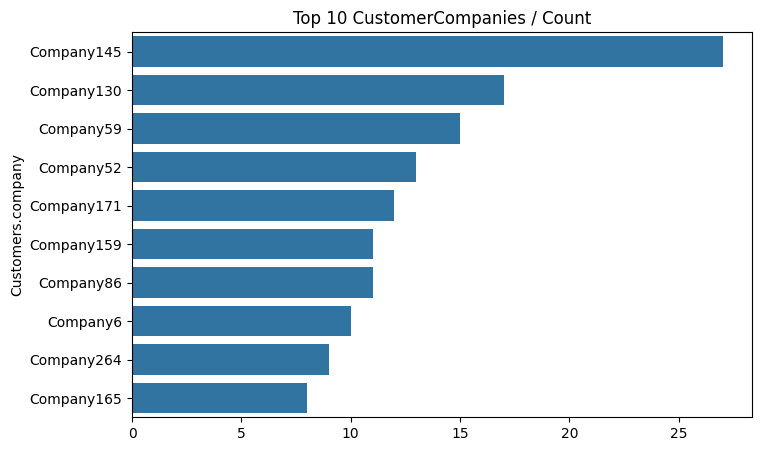

In [71]:
top_companies = df["Customers.company"].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.title("Top 10 CustomerCompanies / Count")
plt.show()

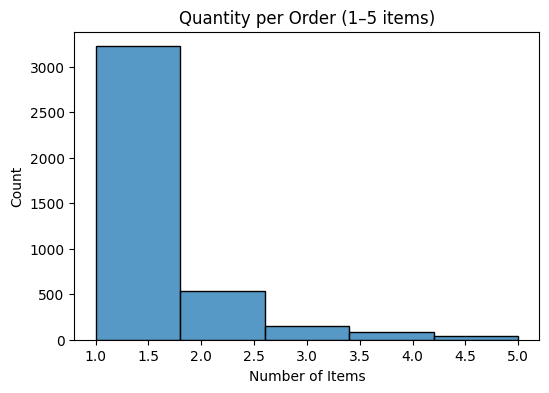

In [77]:
plt.figure(figsize=(6,4))
sns.histplot(df[df["Order_Items.qty"] <= 5]["Order_Items.qty"], bins=5)
plt.title("Quantity per Order (1–5 items)")
plt.xlabel("Number of Items")
plt.ylabel("Count")
plt.show()

In [ ]:
df.shape
